## Create store3 for CarbonPlan (plume data)

In [7]:
polygon_ids_of_interest = [
    '074',
    '131',
    '126',
    '106',
    '140',
    '119',
    '107',
    '124',
    '116',
]

### 1-3 (opening and combining)

In [8]:
from typing import List
import datetime
import re
import glob

import cftime
import xarray as xr
import numpy as np
import dask

In [27]:
# these are the only variables we actually need to calculate delta flux
REQUIRED_DATA_VARIABLES = [
    # ALK (only at surface)
    #'ALK',
    #'ALK_ALT_CO2',
    # DIC (needs to be column integrated)
    #'DIC',
    #'DIC_ALT_CO2',
    # flux (only defined at surface)
    'FG_CO2',
    'FG_ALT_CO2',
    # surface pH
    #'PH',
    #'PH_ALT_CO2',
    # surface Omega (we will need these but currently CO3 isn't in the compressed dataset, so can't calculate Omega)
    #'CO3',
    #'co3_sat_arag',
    #'co3_sat_calc',
    # For vertical integration
    'dz',
    'TAREA',
    # dimension coordinates
    'polygon_id',
    'elapsed_time',
    'injection_date',
    # for regridding
    'ULAT',
    'ULONG',
]

In [10]:
data_dir = '/glade/derecho/scratch/tnicholas/projects/OAE-Global-Efficiency/ResearchGrade/compressed4/'

In [11]:
polygon_id = '000'
injection_month = '01'
single_simulation_glob = data_dir + f'{polygon_id}/{injection_month}/alk-forcing.{polygon_id}-1999-{injection_month}.pop.h.*.nc'
single_simulation_glob

'/glade/derecho/scratch/tnicholas/projects/OAE-Global-Efficiency/ResearchGrade/compressed4/000/01/alk-forcing.000-1999-01.pop.h.*.nc'

In [12]:
%%time
single_simulation = xr.open_mfdataset(
    single_simulation_glob,
    combine='by_coords', # can we do this with combine='nested'?
    data_vars='minimal',
    coords='minimal',
    compat='override',
    join='override',
    #chunks=None,
    chunks={'time': 12, 'z_t': 60, 'nlat': 384, 'nlon': 320},  # open same way files are split (why does this not happen automatically??)
)

CPU times: user 17 s, sys: 2.95 s, total: 20 s
Wall time: 3min 50s


In [13]:
single_simulation

<xarray.Dataset> Size: 55GB
Dimensions:                     (polygon_id: 1, injection_date: 1,
                                 elapsed_time: 180, z_t: 60, nlat: 384,
                                 nlon: 320, d2: 2, z_t_150m: 15, z_w: 60,
                                 z_w_top: 60, z_w_bot: 60)
Coordinates: (12/64)
    time_bound                  (injection_date, elapsed_time, d2) object 3kB dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    time                        (injection_date, elapsed_time) object 1kB dask.array<chunksize=(1, 1), meta=np.ndarray>
  * z_t                         (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 60B 500.0 ... 1.45e+04
  * z_w                         (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 240B 0.0 1e+03 ... 5.25e+05
    ...                          ...
    sflux_factor                float64 8B ...
    nsurface_t                  float64 8B ...
    nsurface_u                  float64 8B ...
  * polygon_id                  (polygon_id) int64 8B 0
  * injection_date              (injection_date) object 8B 1999-01-01 00:00:00
  * elapsed_time                (elapsed_time) timedelta64[ns] 1kB 0 days ......
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/34)
    CO3                         (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    pH_3D                       (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    CO3_ALT_CO2                 (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    pH_3D_ALT_CO2               (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    co3_sat_calc                (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    co3_sat_arag                (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 5GB dask.array<chunksize=(1, 1, 1, 60, 384, 320), meta=np.ndarray>
    ...                          ...
    ALK_ALT_CO2_zint_100m       (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    STF_ALK_ALT_CO2             (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_DIC          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_DIC_ALT_CO2  (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_ALK          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    tend_zint_100m_ALK_ALT_CO2  (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
Attributes:
    title:             smyle-fosi.North_Atlantic_basin.alk-forcing-North_Atla...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2023-05-29 at 09:20:38.7
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

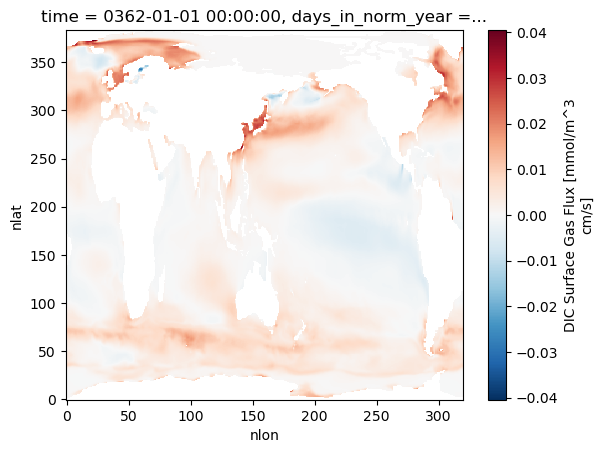

In [14]:
single_simulation['FG_CO2'].isel(elapsed_time=-1).plot()

In [28]:
VARS_TO_DROP = [var_name for var_name in list(single_simulation.variables) if var_name not in REQUIRED_DATA_VARIABLES]

In [29]:
VARS_TO_DROP

['CO3',
 'pH_3D',
 'CO3_ALT_CO2',
 'pH_3D_ALT_CO2',
 'co3_sat_calc',
 'co3_sat_arag',
 'CO2STAR',
 'DCO2STAR',
 'pCO2SURF',
 'DpCO2',
 'PH',
 'ATM_CO2',
 'CO2STAR_ALT_CO2',
 'DCO2STAR_ALT_CO2',
 'pCO2SURF_ALT_CO2',
 'DpCO2_ALT_CO2',
 'PH_ALT_CO2',
 'ALK_FLUX',
 'DIC',
 'DIC_zint_100m',
 'DIC_ALT_CO2',
 'DIC_ALT_CO2_zint_100m',
 'ALK',
 'ALK_zint_100m',
 'STF_ALK',
 'ALK_ALT_CO2',
 'ALK_ALT_CO2_zint_100m',
 'STF_ALK_ALT_CO2',
 'tend_zint_100m_DIC',
 'tend_zint_100m_DIC_ALT_CO2',
 'tend_zint_100m_ALK',
 'tend_zint_100m_ALK_ALT_CO2',
 'time_bound',
 'time',
 'z_t',
 'z_t_150m',
 'z_w',
 'z_w_top',
 'z_w_bot',
 'dzw',
 'TLONG',
 'TLAT',
 'KMT',
 'KMU',
 'REGION_MASK',
 'UAREA',
 'HU',
 'HT',
 'DXU',
 'DYU',
 'DXT',
 'DYT',
 'HTN',
 'HTE',
 'HUS',
 'HUW',
 'ANGLE',
 'ANGLET',
 'days_in_norm_year',
 'grav',
 'omega',
 'radius',
 'cp_sw',
 'sound',
 'vonkar',
 'cp_air',
 'rho_air',
 'rho_sw',
 'rho_fw',
 'stefan_boltzmann',
 'latent_heat_vapor',
 'latent_heat_fusion',
 'latent_heat_fusion_mks

In [30]:
def open_data_for_one_simulation(polygon_id: str, injection_month: str) -> xr.Dataset:

    ds = xr.open_mfdataset(
        data_dir + f'{polygon_id}/{injection_month}/alk-forcing.{polygon_id}-1999-{injection_month}.pop.h.*.nc',
        #preprocess=add_injection_time_coord,
        combine='by_coords', # can we do this with combine='nested'?
        drop_variables=VARS_TO_DROP,
        data_vars='minimal',
        coords='minimal',
        compat='override',
        join='override',
        chunks={'time': 12, 'z_t': 60, 'nlat': 384, 'nlon': 320},  # open same way files are split (why does this not happen automatically??)
    )

    elapsed_time_integer_months = xr.DataArray(np.arange(180), dims=['elapsed_time'], attrs={'units': 'months'})
    ds['elapsed_time'] = elapsed_time_integer_months.astype('int32')

    ds['injection_date'] = xr.DataArray(data=[int(injection_month)], dims='injection_date', attrs={'units': 'month of 1999'}).astype('int32')
    
    #ds = convert_polygon_id_coord_to_int(ds)

    #ds = expand_ensemble_dims(ds)

    #return convert_to_integer_time_coordinates(ds)
    return ds

In [31]:
%%time
ds0 = open_data_for_one_simulation('000', '01')

CPU times: user 9.47 s, sys: 2.13 s, total: 11.6 s
Wall time: 2min 46s


In [32]:
ds0

<xarray.Dataset> Size: 180MB
Dimensions:         (nlat: 384, nlon: 320, polygon_id: 1, injection_date: 1,
                     elapsed_time: 180, z_t: 60)
Coordinates:
    dz              (z_t) float32 240B dask.array<chunksize=(60,), meta=np.ndarray>
    TAREA           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * polygon_id      (polygon_id) int64 8B 0
  * injection_date  (injection_date) int32 4B 1
  * elapsed_time    (elapsed_time) int32 720B 0 1 2 3 4 ... 175 176 177 178 179
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    ULONG           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    FG_CO2          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    FG_ALT_CO2      (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 88MB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
Attributes:
    title:             smyle-fosi.North_Atlantic_basin.alk-forcing-North_Atla...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2023-05-29 at 09:20:38.7
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [20]:
# datasets_grid = [
#     [polygon_id + "-" + injection_month for injection_month in ['01', '04', '07', '10']]
#     for polygon_id in polygon_ids_of_interest
# ]

In [21]:
%%time
datasets_grid = [
    [open_data_for_one_simulation(polygon_id, injection_month) for injection_month in ['01', '04', '07', '10']]
    for polygon_id in polygon_ids_of_interest
]

CPU times: user 5min 30s, sys: 1min 21s, total: 6min 52s
Wall time: 2h 40s


In [22]:
ds_all_polygons_of_interest = xr.combine_nested(datasets_grid, concat_dim=['polygon_id', 'injection_date'])

In [33]:
ds_all_polygons_of_interest['ULONG'] = ds0['ULONG']

In [37]:
ds_all_polygons_of_interest = ds_all_polygons_of_interest.set_coords(['ULONG', 'ULAT'])

In [42]:
ds_all_polygons_of_interest['ULAT'] = ds_all_polygons_of_interest['ULAT'].isel(polygon_id=0, injection_date=0)

In [54]:
ds_all_polygons_of_interest['ULAT'].attrs = ds0['ULAT'].attrs

In [55]:
ds_all_polygons_of_interest

<xarray.Dataset> Size: 6GB
Dimensions:         (nlat: 384, nlon: 320, polygon_id: 9, injection_date: 4,
                     elapsed_time: 180, z_t: 60)
Coordinates:
    ULAT            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    dz              (z_t) float32 240B dask.array<chunksize=(60,), meta=np.ndarray>
    TAREA           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 720B 0 1 2 3 4 ... 175 176 177 178 179
    ULONG           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    FG_CO2          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 3GB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>
    FG_ALT_CO2      (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 3GB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>

In [56]:
ds_all_polygons_of_interest.nbytes / 1e9

6.373049368

In [57]:
ds_all_polygons_of_interest['FG_CO2']

<xarray.DataArray 'FG_CO2' (polygon_id: 9, injection_date: 4,
                            elapsed_time: 180, nlat: 384, nlon: 320)> Size: 3GB
dask.array<concatenate, shape=(9, 4, 180, 384, 320), dtype=float32, chunksize=(1, 1, 1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    ULAT            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 720B 0 1 2 3 4 ... 175 176 177 178 179
    ULONG           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [58]:
#ds_all_polygons_of_interest.isel(elapsed_time=0).to_netcdf('example_plume_data.nc')

In [59]:
delta_flux = ds_all_polygons_of_interest['FG_CO2'] - ds_all_polygons_of_interest['FG_ALT_CO2']

In [60]:
delta_flux

<xarray.DataArray (polygon_id: 9, injection_date: 4, elapsed_time: 180,
                   nlat: 384, nlon: 320)> Size: 3GB
dask.array<sub, shape=(9, 4, 180, 384, 320), dtype=float32, chunksize=(1, 1, 1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    ULAT            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 720B 0 1 2 3 4 ... 175 176 177 178 179
    ULONG           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

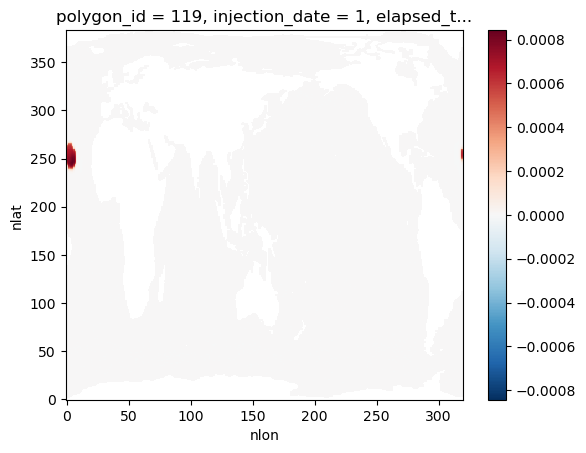

In [49]:
delta_flux.isel(polygon_id=5, injection_date=0, elapsed_time=0).plot()

In [61]:
ds_to_regrid = delta_flux.to_dataset(name='delta_FG_CO2').rio.write_crs('EPSG:4326')

In [62]:
#ds_to_regrid = delta_flux.to_dataset(name='delta_FG_CO2')

In [63]:
ds_to_regrid

<xarray.Dataset> Size: 3GB
Dimensions:         (nlat: 384, nlon: 320, polygon_id: 9, injection_date: 4,
                     elapsed_time: 180)
Coordinates:
    ULAT            (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 720B 0 1 2 3 4 ... 175 176 177 178 179
    ULONG           (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
    spatial_ref     int64 8B 0
Dimensions without coordinates: nlat, nlon
Data variables:
    delta_FG_CO2    (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 3GB dask.array<chunksize=(1, 1, 1, 384, 320), meta=np.ndarray>

In [64]:
import xesmf as xe

ds_template = xe.util.grid_2d(-180, 180, 1.125, -90, 90, 1.0)

In [65]:
regridder = xe.Regridder(ds_to_regrid, ds_template, 'bilinear')

In [66]:
%%time
ds_resampled = regridder(ds_to_regrid)

CPU times: user 2.52 s, sys: 126 ms, total: 2.65 s
Wall time: 7.55 s


In [67]:
ds_resampled

<xarray.Dataset> Size: 1GB
Dimensions:         (polygon_id: 9, injection_date: 4, elapsed_time: 180,
                     y: 180, x: 320)
Coordinates:
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 720B 0 1 2 3 4 ... 175 176 177 178 179
    spatial_ref     int64 8B 0
    lon             (y, x) float64 461kB -179.4 -178.3 -177.2 ... 178.3 179.4
    lat             (y, x) float64 461kB -89.5 -89.5 -89.5 ... 89.5 89.5 89.5
Dimensions without coordinates: y, x
Data variables:
    delta_FG_CO2    (polygon_id, injection_date, elapsed_time, y, x) float32 1GB dask.array<chunksize=(1, 1, 1, 180, 320), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [68]:
ds_subsetted = ds_resampled.isel(elapsed_time=slice(0, None, 12)).chunk(elapsed_time=-1)

In [69]:
ds_subsetted

<xarray.Dataset> Size: 125MB
Dimensions:         (polygon_id: 9, injection_date: 4, elapsed_time: 15,
                     y: 180, x: 320)
Coordinates:
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 60B 0 12 24 36 48 ... 132 144 156 168
    spatial_ref     int64 8B 0
    lon             (y, x) float64 461kB dask.array<chunksize=(180, 320), meta=np.ndarray>
    lat             (y, x) float64 461kB dask.array<chunksize=(180, 320), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    delta_FG_CO2    (polygon_id, injection_date, elapsed_time, y, x) float32 124MB dask.array<chunksize=(1, 1, 15, 180, 320), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

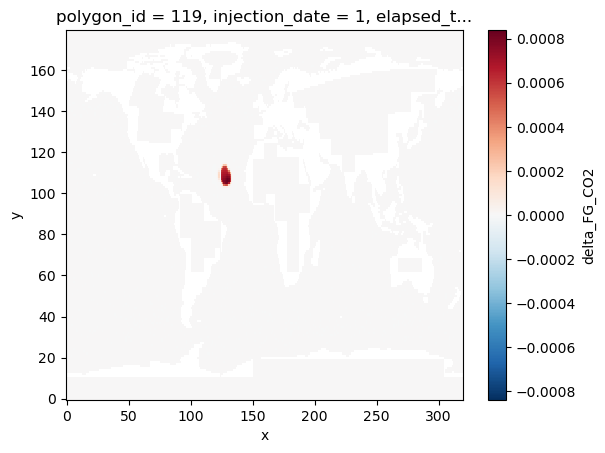

In [70]:
ds_subsetted['delta_FG_CO2'].isel(polygon_id=5, injection_date=0, elapsed_time=0).plot()

In [71]:
desired_chunks_on_disk = {'polygon_id': 1, 'injection_date': 1, 'elapsed_time': 30, 'x': -1, 'y': -1}

In [72]:
rechunked = ds_subsetted.chunk(desired_chunks_on_disk)

In [73]:
rechunked

<xarray.Dataset> Size: 125MB
Dimensions:         (polygon_id: 9, injection_date: 4, elapsed_time: 15,
                     y: 180, x: 320)
Coordinates:
  * polygon_id      (polygon_id) int64 72B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 60B 0 12 24 36 48 ... 132 144 156 168
    spatial_ref     int64 8B 0
    lon             (y, x) float64 461kB dask.array<chunksize=(180, 320), meta=np.ndarray>
    lat             (y, x) float64 461kB dask.array<chunksize=(180, 320), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    delta_FG_CO2    (polygon_id, injection_date, elapsed_time, y, x) float32 124MB dask.array<chunksize=(1, 1, 15, 180, 320), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [80]:
rechunked['lon'] = rechunked['lon'].astype('float32')
rechunked['lat'] = rechunked['lat'].astype('float32')
rechunked['polygon_id'] = rechunked['polygon_id'].astype('int32')

In [81]:
rechunked['delta_FG_CO2'].encoding

{'compressor': Zlib(level=1), '_FillValue': 9.969209968386869e+36}

In [82]:
def set_compression_encoding(ds: xr.Dataset) -> xr.Dataset:
    from zarr import Zlib

    compressor = Zlib(level=1)
    
    for name, var in ds.variables.items():
        
        # avoid using NaN as a fill value, and avoid overflow errors in encoding
        if np.issubdtype(var.dtype, np.integer):
            ds[name].encoding = {'compressor': compressor, '_FillValue': 2_147_483_647}
        elif var.dtype == np.dtype('float32'):
            ds[name].encoding = {'compressor': compressor, '_FillValue': 9.969209968386869e+36}
        else:
            ds[name].encoding = {'compressor': compressor}

    return ds

In [83]:
encoded = set_compression_encoding(rechunked)

In [84]:
encoded

<xarray.Dataset> Size: 125MB
Dimensions:         (polygon_id: 9, injection_date: 4, elapsed_time: 15,
                     y: 180, x: 320)
Coordinates:
  * polygon_id      (polygon_id) int32 36B 74 131 126 106 140 119 107 124 116
  * injection_date  (injection_date) int32 16B 1 4 7 10
  * elapsed_time    (elapsed_time) int32 60B 0 12 24 36 48 ... 132 144 156 168
    spatial_ref     int64 8B 0
    lon             (y, x) float32 230kB dask.array<chunksize=(180, 320), meta=np.ndarray>
    lat             (y, x) float32 230kB dask.array<chunksize=(180, 320), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    delta_FG_CO2    (polygon_id, injection_date, elapsed_time, y, x) float32 124MB dask.array<chunksize=(1, 1, 15, 180, 320), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [85]:
encoded['delta_FG_CO2'].encoding

{'compressor': Zlib(level=1), '_FillValue': 9.969209968386869e+36}

In [86]:
!pwd

/glade/u/home/tnicholas/oae_dataset/CarbonPlan/perlmutter/create_store3


In [87]:
store3_path = '/glade/u/home/tnicholas/oae_dataset/CarbonPlan/perlmutter/store3.zarr'

In [88]:
rechunked.to_zarr(store3_path)